In [1]:
%matplotlib inline
import matplotlib.pyplot as pyplot
import os
import zipfile # Extract zip files
import urllib # Download files from the web
import neurom # Analyse / view morphologies
import neurom.viewer

In [2]:
# urllib.urlretrieve('https://senselab.med.yale.edu/modeldb/eavBinDown.cshtml?o=123623&a=23&mime=application/zip','PospischilEtAl2008.zip');

In [3]:
# import os, zipfile
# with zipfile.ZipFile('PospischilEtAl2008.zip', 'r') as zip_file:
#     zip_file.extractall('.')

In [4]:
# os.chdir('PospischilEtAl2008')

In [5]:
# !nrnivmodl

In [6]:
ls

cadecay_destexhe.mod  IM_cortex.mod     my_exp2syn.mod
HH_traub.mod          IT_huguenard.mod  test_cells.ipynb
IL_gutnick.mod        kca.mod           x86_64/


In [7]:
import neuron as nrn # NEURON simulator

In [8]:
print (nrn.h)
# Load external files
nrn.h.load_file("stdrun.hoc");

<TopLevelHocInterpreter>


In [9]:
# nrn.h.load_file("mosinit.hoc");

In [10]:
# nrn.h.load_file("demo_PY_IBR.hoc");

In [11]:
soma = nrn.h.Section(name='soma')

print ("Soma object:", soma)
print ("Soma object name: ", soma.name())

soma.nseg = 1 #
soma.diam = 96 #
soma.L = 96 #			// so that area is about 29000 um2
soma.cm = 1 #
soma.Ra = 100 #		// geometry 

print ("Number of segments in the soma:", soma.nseg)
print (soma.diam)
print (soma.L)
print (soma.cm)
print (soma.Ra)

Soma object: soma
Soma object name:  soma
Number of segments in the soma: 1
96.0
96.0
1.0
100.0


In [12]:
nrn.h.tstop = 3000
nrn.h.dt = 0.01
print ("Simulation stop time: %f ms" % nrn.h.tstop)
print ("Integration time step: %f ms" % nrn.h.dt)

time = nrn.h.Vector()
voltage = nrn.h.Vector()

time.record(nrn.h._ref_t)
voltage.record(soma(.5)._ref_v);

iclamp = nrn.h.IClamp(.5, sec=soma)
iclamp.amp = 0.15 # nA
iclamp.delay = 500 # ms
iclamp.dur = 2000 # ms

Simulation stop time: 3000.000000 ms
Integration time step: 0.010000 ms


In [13]:
soma.insert('pas');
soma.e_pas = -85
soma.g_pas = 1e-5 #		// idem TC cell

In [14]:
soma.insert('hh2'); #		// Hodgin-Huxley INa and IK 
soma.ek = -100 #		// potassium reversal potential 
soma.ena = 50 #			// sodium reversal potential 
soma.vtraub_hh2 = -55 #	// Resting Vm, BJ was -55
soma.gnabar_hh2 = 0.05 #	// McCormick=15 muS, thal was 0.09
soma.gkbar_hh2 = 0.005 #	// spike duration of pyr cells
celsius = 36
v_init = -84

In [15]:
soma.insert('im'); #		// M current 
taumax_im = 1000
soma.gkbar_im = 3e-5 #		// specific to LTS pyr cell

In [16]:
soma.insert('cad');  #		// calcium decay
soma.depth_cad = 1 #		// McCormick= 0.1 um
soma.taur_cad = 5 #		// McCormick=1 ms !!!
soma.cainf_cad = 2.4e-4 #	// McCormick=0
soma.kt_cad = 0 #		// no pump

In [17]:
soma.insert('ical'); #// IL current (Reuveni et al. model, Nernst)
soma.cai = 2.4e-4 
soma.cao = 2 
#soma.eca = 120 
soma.gcabar_ical = 2.2e-4

In [18]:
soma.insert('it'); #// IT current 
soma.cai = 2.4e-4 
soma.cao = 2 
#eca = 120 
soma.gcabar_it = 0.0004 #// specific to LTS pyr cell

In [19]:
nrn.h.tstop = 3000
nrn.h.dt = 0.01
iclamp = nrn.h.IClamp(.5, sec=soma)
iclamp.amp = 0.15 # nA
iclamp.delay = 500 # ms
iclamp.dur = 2000 # ms

In [20]:
soma.depth_cad = 1 #		// McCormick= 0.1 um

Changed dt


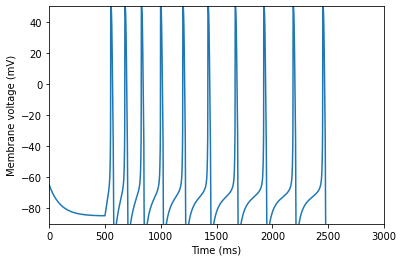

In [21]:
time = nrn.h.Vector()
voltage = nrn.h.Vector()
#mthh2 = nrn.h.Vector()
#hthh2 = nrn.h.Vector()
#nthh2 = nrn.h.Vector()
#mtim = nrn.h.Vector()
#mtical = nrn.h.Vector()
#htical = nrn.h.Vector()
#caitcad = nrn.h.Vector()
#icatcad = nrn.h.Vector()
#ecatcad = nrn.h.Vector()
stim_current = nrn.h.Vector()


stim_current.record(iclamp._ref_i)
time.record(nrn.h._ref_t)
voltage.record(soma(.5)._ref_v);
#mthh2.record(soma(.5)._ref_m_hh2);
#hthh2.record(soma(.5)._ref_h_hh2);
#nthh2.record(soma(.5)._ref_n_hh2);
#mtim.record(soma(.5)._ref_m_im);
#mtical.record(soma(.5)._ref_m_ical);
#htical.record(soma(.5)._ref_h_ical);
#caitcad.record(soma(.5)._ref_cai);
#icatcad.record(soma(.5)._ref_ica);
#ecatcad.record(soma(.5)._ref_eca);

nrn.h.run()

def plot_tv(time_array, voltage_array, show=True, label=None, ylabel='Membrane voltage (mV)', xyaxis=[2690, 3000, -85, 50] , constants=[]):
    import matplotlib.pyplot as plt
    import numpy
    plt.plot(time_array, voltage_array, label=label)
    for constant in constants:
        plt.plot(time_array, constant*numpy.ones(len(time_array)))
    plt.xlabel('Time (ms)')
    plt.ylabel(ylabel)
    plt.axis(xyaxis)
    if show:
        plt.show()

xinitial = 0
xfinal = 3000
plot_tv(time, voltage, ylabel='Membrane voltage (mV)', xyaxis=[xinitial, xfinal, -90, 50])
#plot_tv(time, mthh2, ylabel='m_hh2', xyaxis=[xinitial, xfinal, 0, 1])
#plot_tv(time, hthh2, ylabel='h_hh2', xyaxis=[xinitial, xfinal, 0, 1])
#plot_tv(time, nthh2, ylabel='n_hh2', xyaxis=[xinitial, xfinal, 0, 1])
#plot_tv(time, mtim, ylabel='m_im', xyaxis=[xinitial, xfinal, 0, 1])
#plot_tv(time, mtical, ylabel='m_ical', xyaxis=[xinitial, xfinal, 0, 1])
#plot_tv(time, htical, ylabel='h_ical', xyaxis=[xinitial, xfinal, 0.6, 0.8])
#plot_tv(time, caitcad, ylabel='cai_cad', xyaxis=[xinitial, xfinal, 0.0002, 0.004])
#plot_tv(time, icatcad, ylabel='ica', xyaxis=[xinitial, xfinal, -0.02, 0.0001])
#plot_tv(time, ecatcad, ylabel='Eca', xyaxis=[xinitial, xfinal, 80, 125.0])


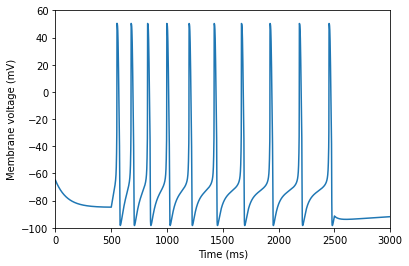

In [24]:
plot_tv(time, voltage, ylabel='Membrane voltage (mV)', xyaxis=[0, 3000, -100, 60])

In [25]:
print (soma.eca)
print (soma.ica)
print (soma.cai)
print (soma.v)
print (soma.m_ical)
print (soma.h_ical)

108.68161125672772
-5.466252094084259e-07
0.00024013968733497444
-91.81288395367241
5.517842452981333e-08
0.7762828991810017


In [27]:
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

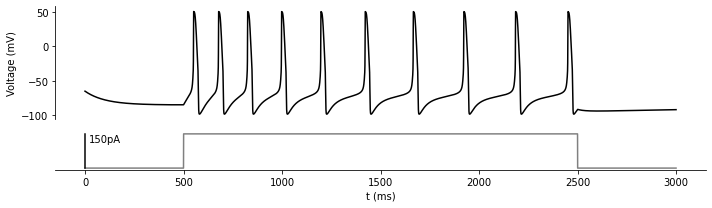

In [28]:
f, (ax0, ax1) = plt.subplots(2,1, figsize=(10,3), gridspec_kw = {'height_ratios':[3, 1]})
ax0.plot(time,voltage, 'k')
ax1.plot(time,stim_current, 'gray')

ax0.set_ylabel('Voltage (mV)')
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.get_xaxis().set_visible(False)


ax1.plot([0,0],[0,0.15],'k')
ax1.text(20,0.125,'150pA',va='center')
ax1.set_ylabel('I (nA)')
ax1.set_xlabel('t (ms)')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_yaxis().set_visible(False)
plt.tight_layout()